In [1]:
## Initialization and imports
import pandas as pd 
import numpy as np 

## Changing directory to top folder (All programs run from top)
import os
os.chdir('/Users/nschumacher/docs/galvanize/smunch-user-food-analysis')
from clustering.cluster_post_prep import *

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib import pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'

## Set random seed
np.random.seed(seed=14)

#### Kmeans clustering

In [2]:
top_ing_f = get_df()
X = top_ing_f.values

In [3]:
## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=3, random_state=0, n_jobs=-1).fit(X)

In [4]:
## Print the top words from each topic
def print_top_ingredients(centroid_data, vocab, n_top_words):
    
    ## Getting sorted indexs of feature importance
    sortedX = np.argsort(centroid_data, axis = 1)
    
    ## Printing top words in each 'topic'
    t = {}
    for i, row in enumerate(sortedX[:, -1:-n_top_words-1:-1]):
        t[i] = [vocab[i] for i in row]
        #print("Topic", i,':', ', '.join([vocab[i] for i in row]))
    
    return pd.DataFrame(t)

In [18]:
print_top_ingredients(kmeans.cluster_centers_, top_ing_f.columns.values, 15)

,0,1,2
0,spicy sauce,veg,butter
1,noodles,tofu,egg
2,rice,avocado,beef
3,sour,falafel,pork
4,noodle,grain,mayo
5,salmon,dressing,dairy
6,salad,peas,flour
7,soy,sour sauce,potatoes
8,duck,seeds,chicken
9,octopus,sweet sauce,alc


In [19]:
lbls = kmeans.labels_
for i in range(3):
    print("Topic {0} makes up {1:2.2f}% of customer base".format(i, np.mean(lbls == i)*100))

Topic 0 makes up 11.39% of customer base
Topic 1 makes up 39.71% of customer base
Topic 2 makes up 48.90% of customer base


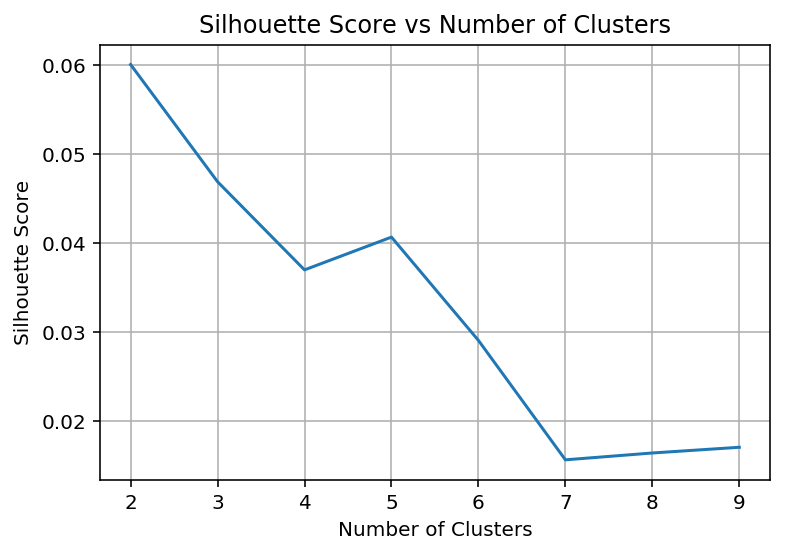

In [15]:
## Scoring Kmeans

## Running kmeans
def run_kmeans(data, n):
    kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1).fit(data)
    
    return silhouette_score(data, kmeans.labels_)


## Finds the opitmal k value
def find_k(data, k):
    sil_scores = []
    for i in range(2, k):
        scores = (run_kmeans(data, i))
        sil_scores.append(scores)
        
    return sil_scores 

sils = find_k(X, 10)

plt.title("Silhouette Score vs Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.grid()
plt.plot(range(2, len(sils)+2), sils)

#### Hierarchical Clustering

In [16]:
def high_clustering(data, sample_size, dist_measure='cosine', plot='yes'):

    ## Selecting n random customers to look at
    trimmed_data = np.random.choice(range(data.shape[0]), sample_size)
    X = data.iloc[trimmed_data]

    ## Get vector distances (can be different measures) and squaring array
    Y = pdist(X, 'cosine')
    squareY = squareform(Y)

    ## Creates the linkage matrix with 
    return linkage(squareY, 'average')

## Plot the dendrogram
def plot_dendro(Z, labels, orient='top', thresh=None, font_s=20):
    fig = plt.figure(figsize=(25, 20))
    dn = dendrogram(Z)

    ## Grabbing the labels for each leaf
    section = np.array(dn["ivl"]).astype(int)
    lbls = labels[section]
    
    dn = dendrogram(Z, 
                    orientation=orient,
                    color_threshold=thresh,
                    labels=lbls,
                    leaf_font_size=font_s)
    plt.ylabel('Threshold')
    plt.xlabel('User')
    plt.title('User Ingredient Frequency Dendrogram')
    plt.show()

/Users/nschumacher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


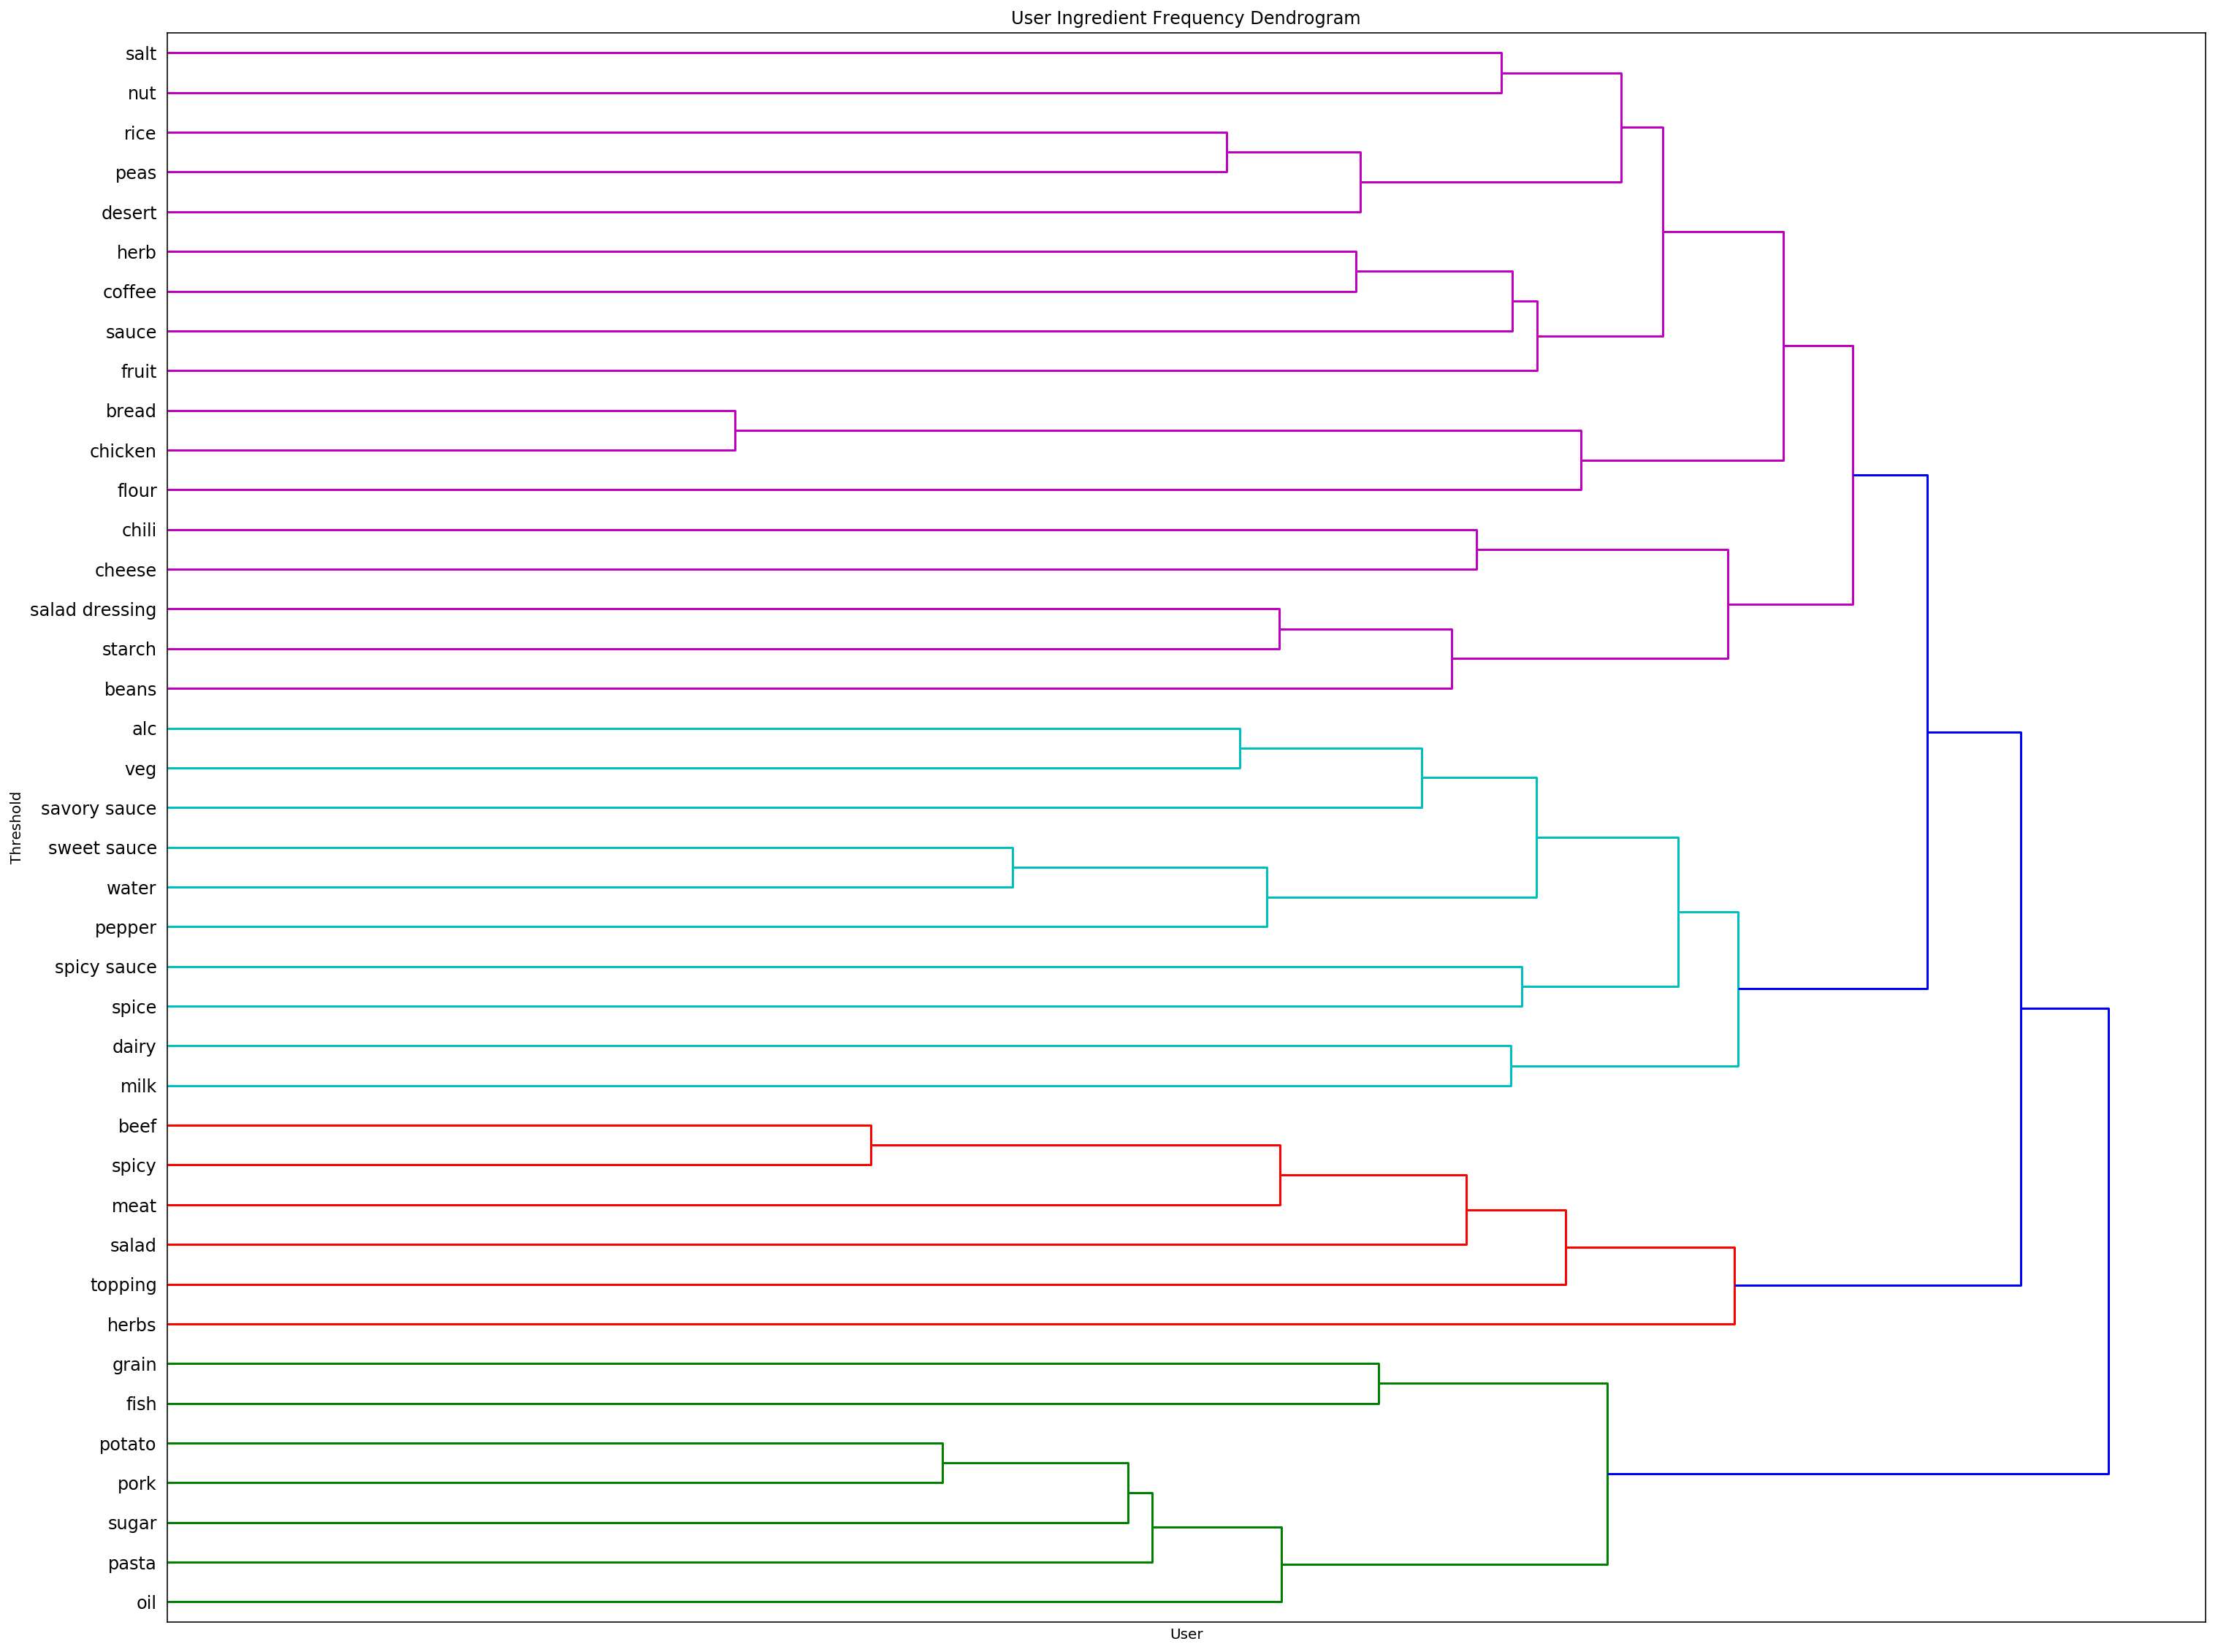

In [17]:
linkage1 = high_clustering(top_ing_f, 40)
plot_dendro(linkage1, top_ing_f.columns, orient='right', thresh=1.9, font_s=12)